# Treinando o nosso primeiro classificador


## Primeiro vamos escolher um dataset

- Joseph Samuel Neiva
- - 03/10

In [20]:
import pandas as pd
import seaborn as sns
from sklearn.datasets import load_breast_cancer
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score

import matplotlib.pyplot as plt
import numpy as np

In [21]:


# Load the dataset
data = load_breast_cancer()


In [22]:
data.feature_names

array(['mean radius', 'mean texture', 'mean perimeter', 'mean area',
       'mean smoothness', 'mean compactness', 'mean concavity',
       'mean concave points', 'mean symmetry', 'mean fractal dimension',
       'radius error', 'texture error', 'perimeter error', 'area error',
       'smoothness error', 'compactness error', 'concavity error',
       'concave points error', 'symmetry error',
       'fractal dimension error', 'worst radius', 'worst texture',
       'worst perimeter', 'worst area', 'worst smoothness',
       'worst compactness', 'worst concavity', 'worst concave points',
       'worst symmetry', 'worst fractal dimension'], dtype='<U23')

In [23]:
data.target_names

array(['malignant', 'benign'], dtype='<U9')

In [24]:
df = pd.DataFrame(data.data, columns=data.feature_names)
df['target'] = data.target
df

,mean radius,mean texture,mean perimeter,mean area,mean smoothness,mean compactness,mean concavity,mean concave points,mean symmetry,mean fractal dimension,...,worst texture,worst perimeter,worst area,worst smoothness,worst compactness,worst concavity,worst concave points,worst symmetry,worst fractal dimension,target
0,17.99,10.38,122.80,1001.0,0.11840,0.27760,0.30010,0.14710,0.2419,0.07871,...,17.33,184.60,2019.0,0.16220,0.66560,0.7119,0.2654,0.4601,0.11890,0
1,20.57,17.77,132.90,1326.0,0.08474,0.07864,0.08690,0.07017,0.1812,0.05667,...,23.41,158.80,1956.0,0.12380,0.18660,0.2416,0.1860,0.2750,0.08902,0
2,19.69,21.25,130.00,1203.0,0.10960,0.15990,0.19740,0.12790,0.2069,0.05999,...,25.53,152.50,1709.0,0.14440,0.42450,0.4504,0.2430,0.3613,0.08758,0
3,11.42,20.38,77.58,386.1,0.14250,0.28390,0.24140,0.10520,0.2597,0.09744,...,26.50,98.87,567.7,0.20980,0.86630,0.6869,0.2575,0.6638,0.17300,0
4,20.29,14.34,135.10,1297.0,0.10030,0.13280,0.19800,0.10430,0.1809,0.05883,...,16.67,152.20,1575.0,0.13740,0.20500,0.4000,0.1625,0.2364,0.07678,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
564,21.56,22.39,142.00,1479.0,0.11100,0.11590,0.24390,0.13890,0.1726,0.05623,...,26.40,166.10,2027.0,0.14100,0.21130,0.4107,0.2216,0.2060,0.07115,0
565,20.13,28.25,131.20,1261.0,0.09780,0.10340,0.14400,0.09791,0.1752,0.05533,...,38.25,155.00,1731.0,0.11660,0.19220,0.3215,0.1628,0.2572,0.06637,0
566,16.60,28.08,108.30,858.1,0.08455,0.10230,0.09251,0.05302,0.1590,0.05648,...,34.12,126.70,1124.0,0.11390,0.30940,0.3403,0.1418,0.2218,0.07820,0
567,20.60,29.33,140.10,1265.0,0.11780,0.27700,0.35140,0.15200,0.2397,0.07016,...,39.42,184.60,1821.0,0.16500,0.86810,0.9387,0.2650,0.4087,0.12400,0


/home/neiva/.local/lib/python3.10/site-packages/seaborn/axisgrid.py:123: UserWarning: The figure layout has changed to tight
  self._figure.tight_layout(*args, **kwargs)


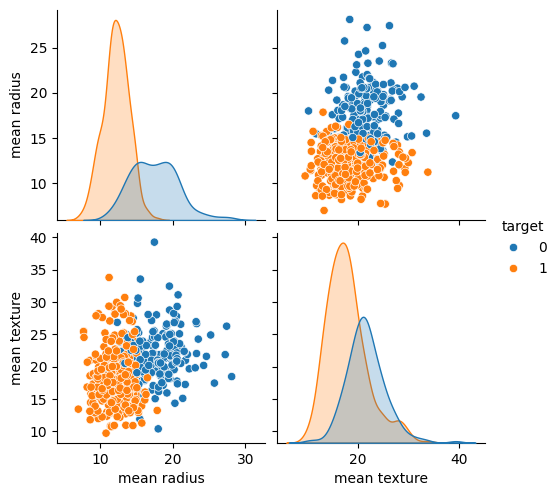

In [25]:
#sempre bom fazer isso antes de trabalhar
sns.pairplot(df[['mean radius',  'mean texture', 'target']], hue='target')

In [26]:
# Separando o dataset em target (Y) e preditores (X)
AllX = df.drop('target', axis=1)
AllY = df['target']
X_train, X_test, y_train, y_test = train_test_split(AllX, AllY, test_size=0.3, random_state=42)

# Qual o motivo e a função do dataset de treino e de teste

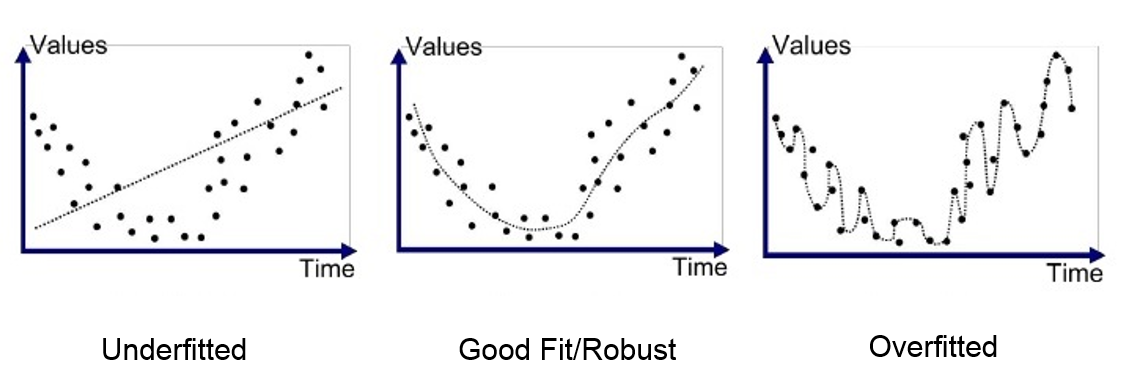!

In [19]:
# O classificador que escolhemos pode se beneficiar de dados normalizados
# https://scikit-learn.org/stable/modules/generated/sklearn.preprocessing.StandardScaler.html
from sklearn.preprocessing import StandardScaler
scaler = StandardScaler()
#fit_transform aprende os limites de cada coluna
X_train = scaler.fit_transform(X_train)
# transform ja aprendeu os limites, e somente transforma as colunas
X_test = scaler.transform(X_test)

# Cria o classificador e realize o treinamento
# https://scikit-learn.org/stable/modules/generated/sklearn.linear_model.LogisticRegression.html
clf = LogisticRegression(random_state=42)
clf.fit(X_train, y_train)

y_pred = clf.predict(X_test)
# Como julgar se o resultado foi bom ou ruim?


# Medindo desempenho

Como medir o desempenho de um classificador? Como indicar de maneira clara que ele está cumprindo o papel que foi pedido?

Segue uma descrição geral de subconjuntos comumente utilizados  para medir o desempenho de um classificador.

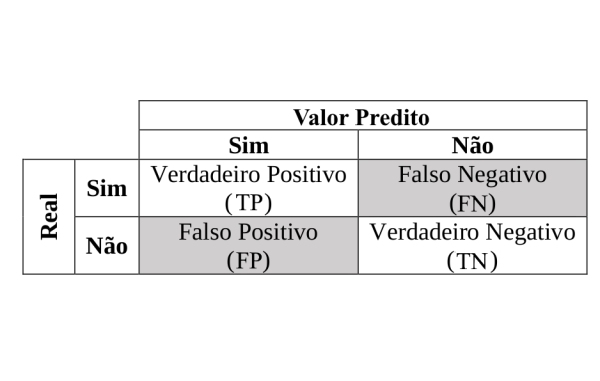

# Medindo desempenho: Accuracy

    Fórmula: (TP+TN)/ (TP+TN+FP+FN)

Uma limitação da 'accuracy' (acurácia) é que ela não leva em consideração a distribuição das classes na base de dados. Em outras palavras, se houver um desequilíbrio significativo entre as classes, o classificador pode ter um desempenho aparentemente bom na acurácia, mas pode estar tendo um desempenho ruim em relação à classe minoritária.

Outra limitação é que a acurácia pode ser enganosa quando há custos diferentes associados a erros de classificação diferentes. Por exemplo, em um problema de detecção de fraudes em cartão de crédito, um falso positivo (classificar uma transação normal como fraudulenta) pode ter um custo muito menor do que um falso negativo (classificar uma transação fraudulenta como normal).

In [ ]:

# https://scikit-learn.org/stable/modules/generated/sklearn.metrics.accuracy_score.html
accuracy = accuracy_score(y_test, y_pred)

print(f"Accuracy: {accuracy:.2f}")
print(f"Distribution\n {df['target'].value_counts()}")

Accuracy: 0.98
Distribution
 1    357
0    212
Name: target, dtype: int64


# Precision & Recall

Precision

Formula: TP/(TP + FP)

Recall: TP/(TP + FN)

In [ ]:
# Outras medidas de desempenho
from sklearn.metrics import precision_score, recall_score, f1_score

# https://scikit-learn.org/stable/modules/generated/sklearn.metrics.precision_score.html
precision = precision_score(y_test, y_pred)

# https://scikit-learn.org/stable/modules/generated/sklearn.metrics.recall_score.html
recall = recall_score(y_test, y_pred)

# https://scikit-learn.org/stable/modules/generated/sklearn.metrics.f1_score.html
f1 = f1_score(y_test, y_pred)
print(f"{precision=}, {recall=} and {f1=}")

precision=0.9906542056074766, recall=0.9814814814814815 and f1=0.986046511627907


# Precision recall

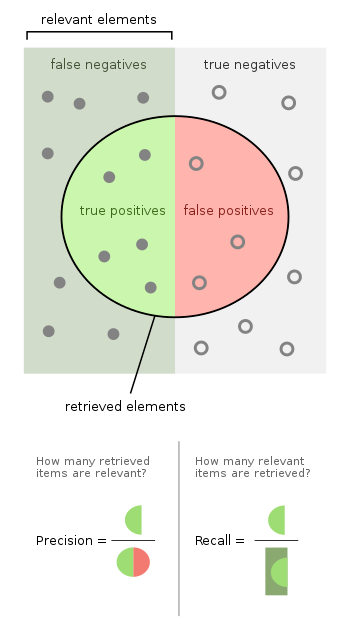